# Lab 2 : Bivariate and multivariate Data analysis

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

## Part A : Multivariate analysis on the Fisher Iris dataset

#### Question 1 : Open the iris.csv file with any regular editor to see what the data look like (how many rows and attributes, which separator, etc.) and then use the proper pandas instructions to load the data. Check the format of your dataset afterwards.

In [100]:
df = pd.read_csv("Data/iris.csv")

In [101]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [102]:
df.shape

(150, 5)

In [103]:
df.describe

<bound method NDFrame.describe of      SepalLength  SepalWidth  PetalLength  PetalWidth      Class
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]>

#### Question 2 : Display the histograms of the different attributes. You may use the distplot function from the seaborn library. What can you say about their distributions ?

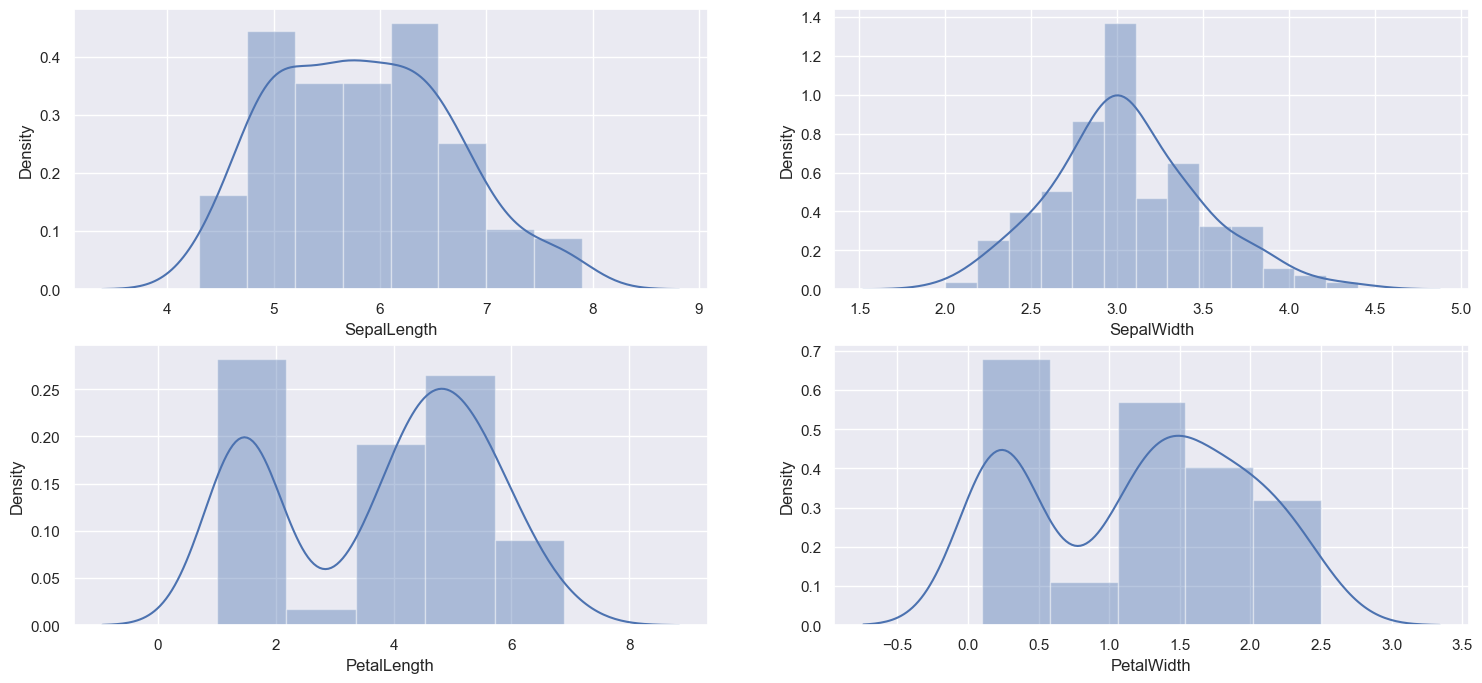

In [104]:
SepalLength=df['SepalLength']
SepalWidth=df['SepalWidth']
PetalLength=df['PetalLength']
PetalWidth=df['PetalWidth']

fig,axes = plt.subplots(2,2,figsize=(18,8))
sns.distplot(SepalLength,ax=axes[0][0])
sns.distplot(SepalWidth,ax=axes[0][1])
sns.distplot(PetalLength,ax=axes[1][0])
sns.distplot(PetalWidth,ax=axes[1][1])
plt.show()

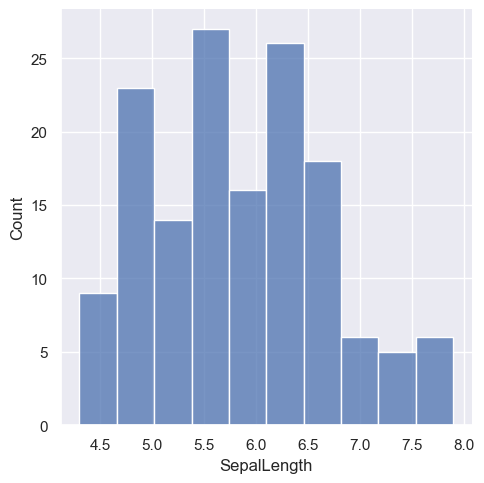

In [105]:
sns.displot(df['SepalLength'],bins=10)
plt.show()

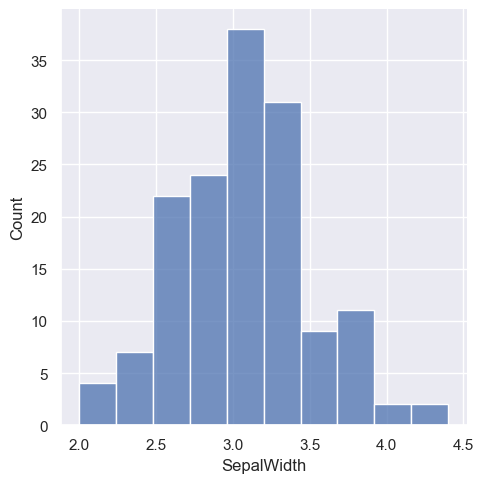

In [106]:
sns.displot(df['SepalWidth'],bins=10)
plt.show()

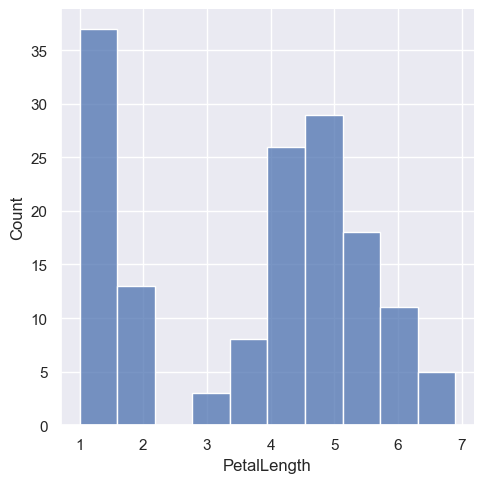

In [107]:
sns.displot(df['PetalLength'],bins=10)
plt.show()

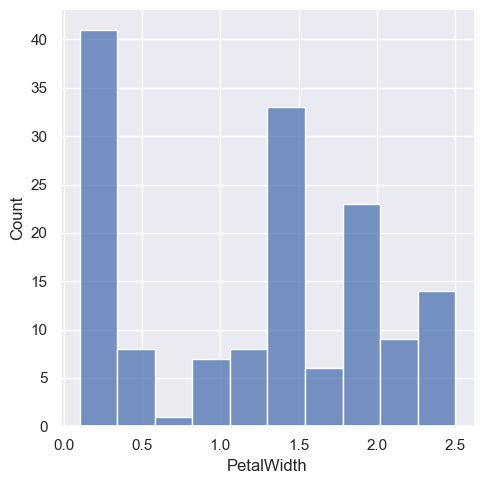

In [108]:
sns.displot(df['PetalWidth'],bins=10)
plt.show()

<u> Answer 2 </u>

From the petals, we see at least two groups because of the bimodal looking distributions.

#### Question 3 : Compute the coefficient of correlation between all attributes using the function corr() from pandas. Comment.

In [109]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<u> Answer 3 </u>

We see 3 strong positive correlations : 
- Petal width / sepal length
- Septal length / petal length
- petal length / petal width

The other correlations are negative and less obvious.

#### Question 4 : Use the commands pairplot() and heatmap() from the seaborn library to visualize your data and the correlation matrix. Comment your results.

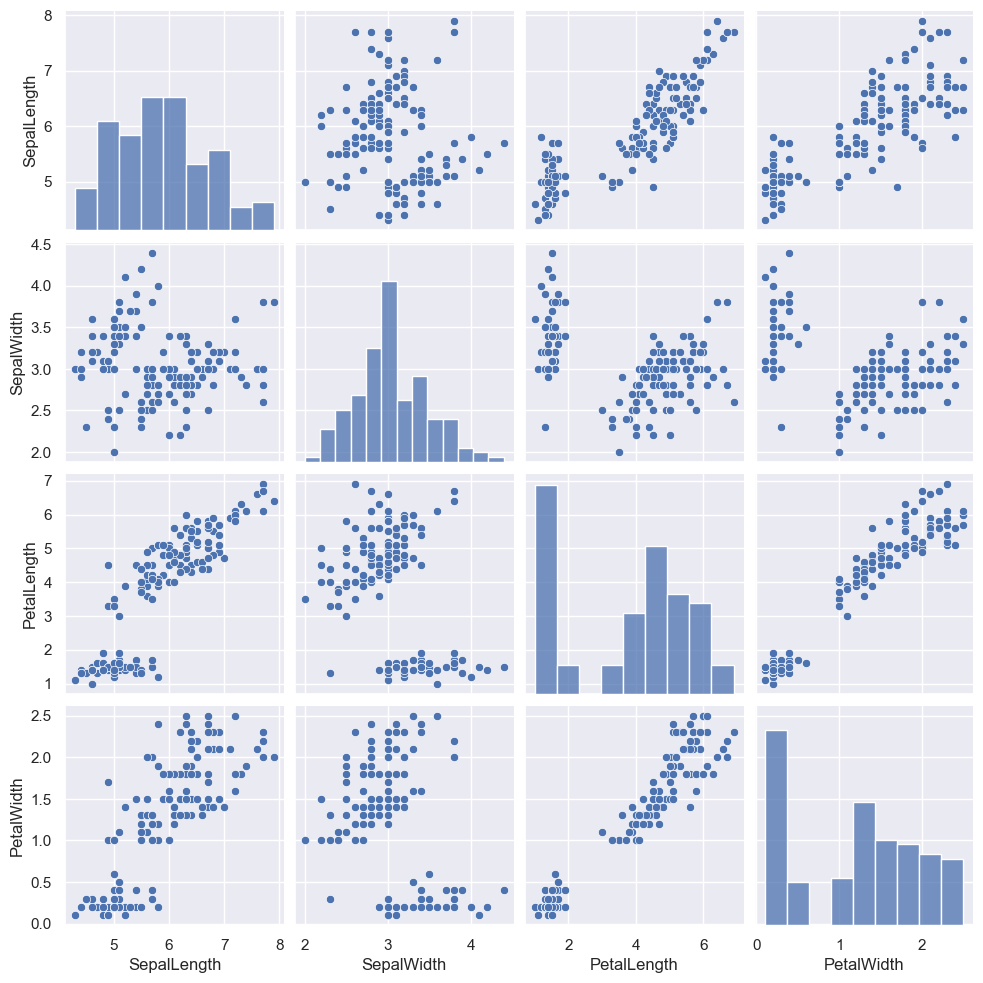

In [110]:
sns.pairplot(df)
plt.show()

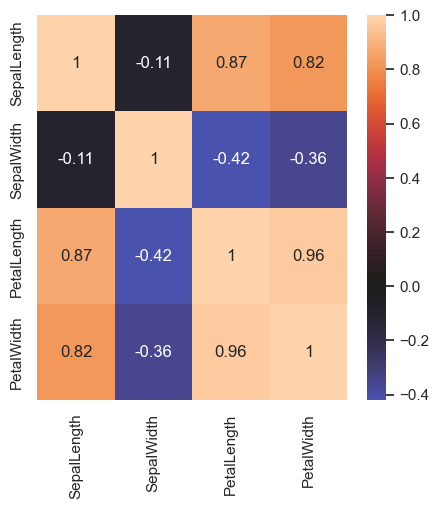

In [111]:
fig,axes = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True,center=0)
plt.show()

#### Question 5 : Compute the confidence intervals for the correlation coefficients (you will mention any hypothesis -regardless of its validity- you made). you may dispay your results in any way you see fit. Comment your results.

In [112]:
def confidence_interval(r,n):
    Z = (np.log(1+r)-np.log(1-r))/2
    sz = np.sqrt(1/(n-3))
    Zinf = Z-1.96*sz
    Zsup = Z+1.96*sz
    icinf,icsup = ((np.exp(2*Zinf)-1)/(np.exp(2*Zinf)+1)),((np.exp(2*Zsup)-1)/(np.exp(2*Zsup)+1))
    return icinf,icsup

def compute_all_interval(dataframe):
    dataframe = dataframe.select_dtypes(include=['number'])
    
    attributelist = list(dataframe.columns.values)
    n = np.square(len(attributelist))
    corr_matrix = dataframe.corr()
    interval_matrix_min = []
    interval_matrix_max = []
    
    for i in range(0,len(attributelist)):
        for j in range(0,len(attributelist)):
            interval_matrix_min.append(confidence_interval(corr_matrix.values[i][j],dataframe.shape[0])[0])
            interval_matrix_max.append(confidence_interval(corr_matrix.values[i][j],dataframe.shape[0])[1])
            
    leninterval = dataframe.shape[1]
    interval_matrix_min = np.reshape(interval_matrix_min,(leninterval,leninterval))
    interval_matrix_max = np.reshape(interval_matrix_max,(leninterval,leninterval))
    return interval_matrix_min,interval_matrix_max

In [113]:
iris_interval_min,iris_interval_max = compute_all_interval(df)

Minimum of the confidence interval of the iris dataset


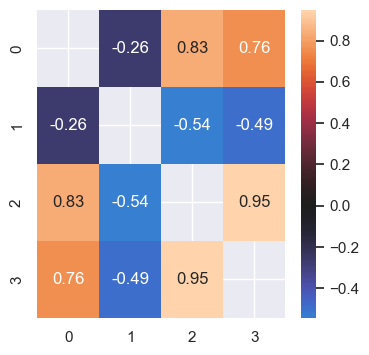

In [114]:
fig,axes = plt.subplots(figsize=(4,4))
sns.heatmap(iris_interval_min,annot=True,center=0)
print('Minimum of the confidence interval of the iris dataset')

Maximum of the confidence interval of the iris dataset


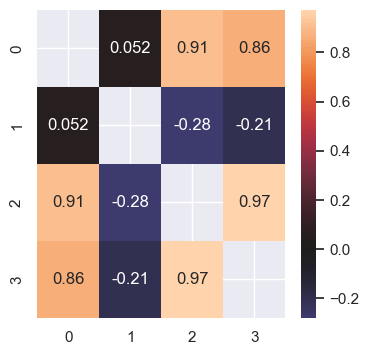

In [115]:
fig,axes = plt.subplots(figsize=(4,4))
sns.heatmap(iris_interval_max,annot=True,center=0)
print('Maximum of the confidence interval of the iris dataset')

<u> Answer 5 </u>

- For the 3 strong correlations that we found, we narrow and strictly positive confidence intervals, which confirm the validity of the correlations we found.
- For the sepal width to sepal length, 0 is in the confidence interval : therefore there is no correlation
- For all other correlatiosn, they are confirmed weak, but strictly negative

## Part B : Multivariate data set: Anthropometric data

In this exercise, we study the "mansize" data set. These data described anthropometric features acquired in a famous medicine University based on a population of Bachelor students.

#### Question 1 : Load the mansize.csv dataset using the proper pandas commands and the right parameters. 

In [116]:
df_mansize = pd.read_csv("Data/mansize.csv",sep=";")

#### Question 2 : Use the describe function from pandas. Remind what this function does and comment on the results.

In [117]:
df_mansize.describe()

,Age,Height (cm),Weight (kg),Femur Length (cm),Feet Size (cm),Arm span (cm),Hand length (cm),Cranial volume (cm3),Penis size (cm)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,20.447205,173.223602,73.357143,47.516149,24.967702,183.040994,18.885093,1418.105590,13.394410
std,1.676681,12.346546,14.160746,5.210949,2.703530,8.989101,1.247258,49.010535,1.481986
min,18.000000,150.000000,40.000000,37.100000,18.900000,159.600000,15.800000,1298.000000,9.100000
25%,19.000000,165.000000,63.100000,43.600000,23.100000,176.300000,18.200000,1382.000000,12.500000
50%,20.000000,172.000000,71.500000,47.400000,25.100000,181.700000,18.900000,1418.000000,13.400000
75%,22.000000,181.000000,81.100000,51.300000,26.700000,188.900000,19.800000,1450.000000,14.300000
max,24.000000,203.000000,115.200000,62.100000,32.200000,206.900000,22.600000,1558.000000,18.400000


<u> Answer 2</u>

It gives the main basic statistics for all variables

#### Question 3 : Display the histograms of the different attributes. What can you say about their distributions?

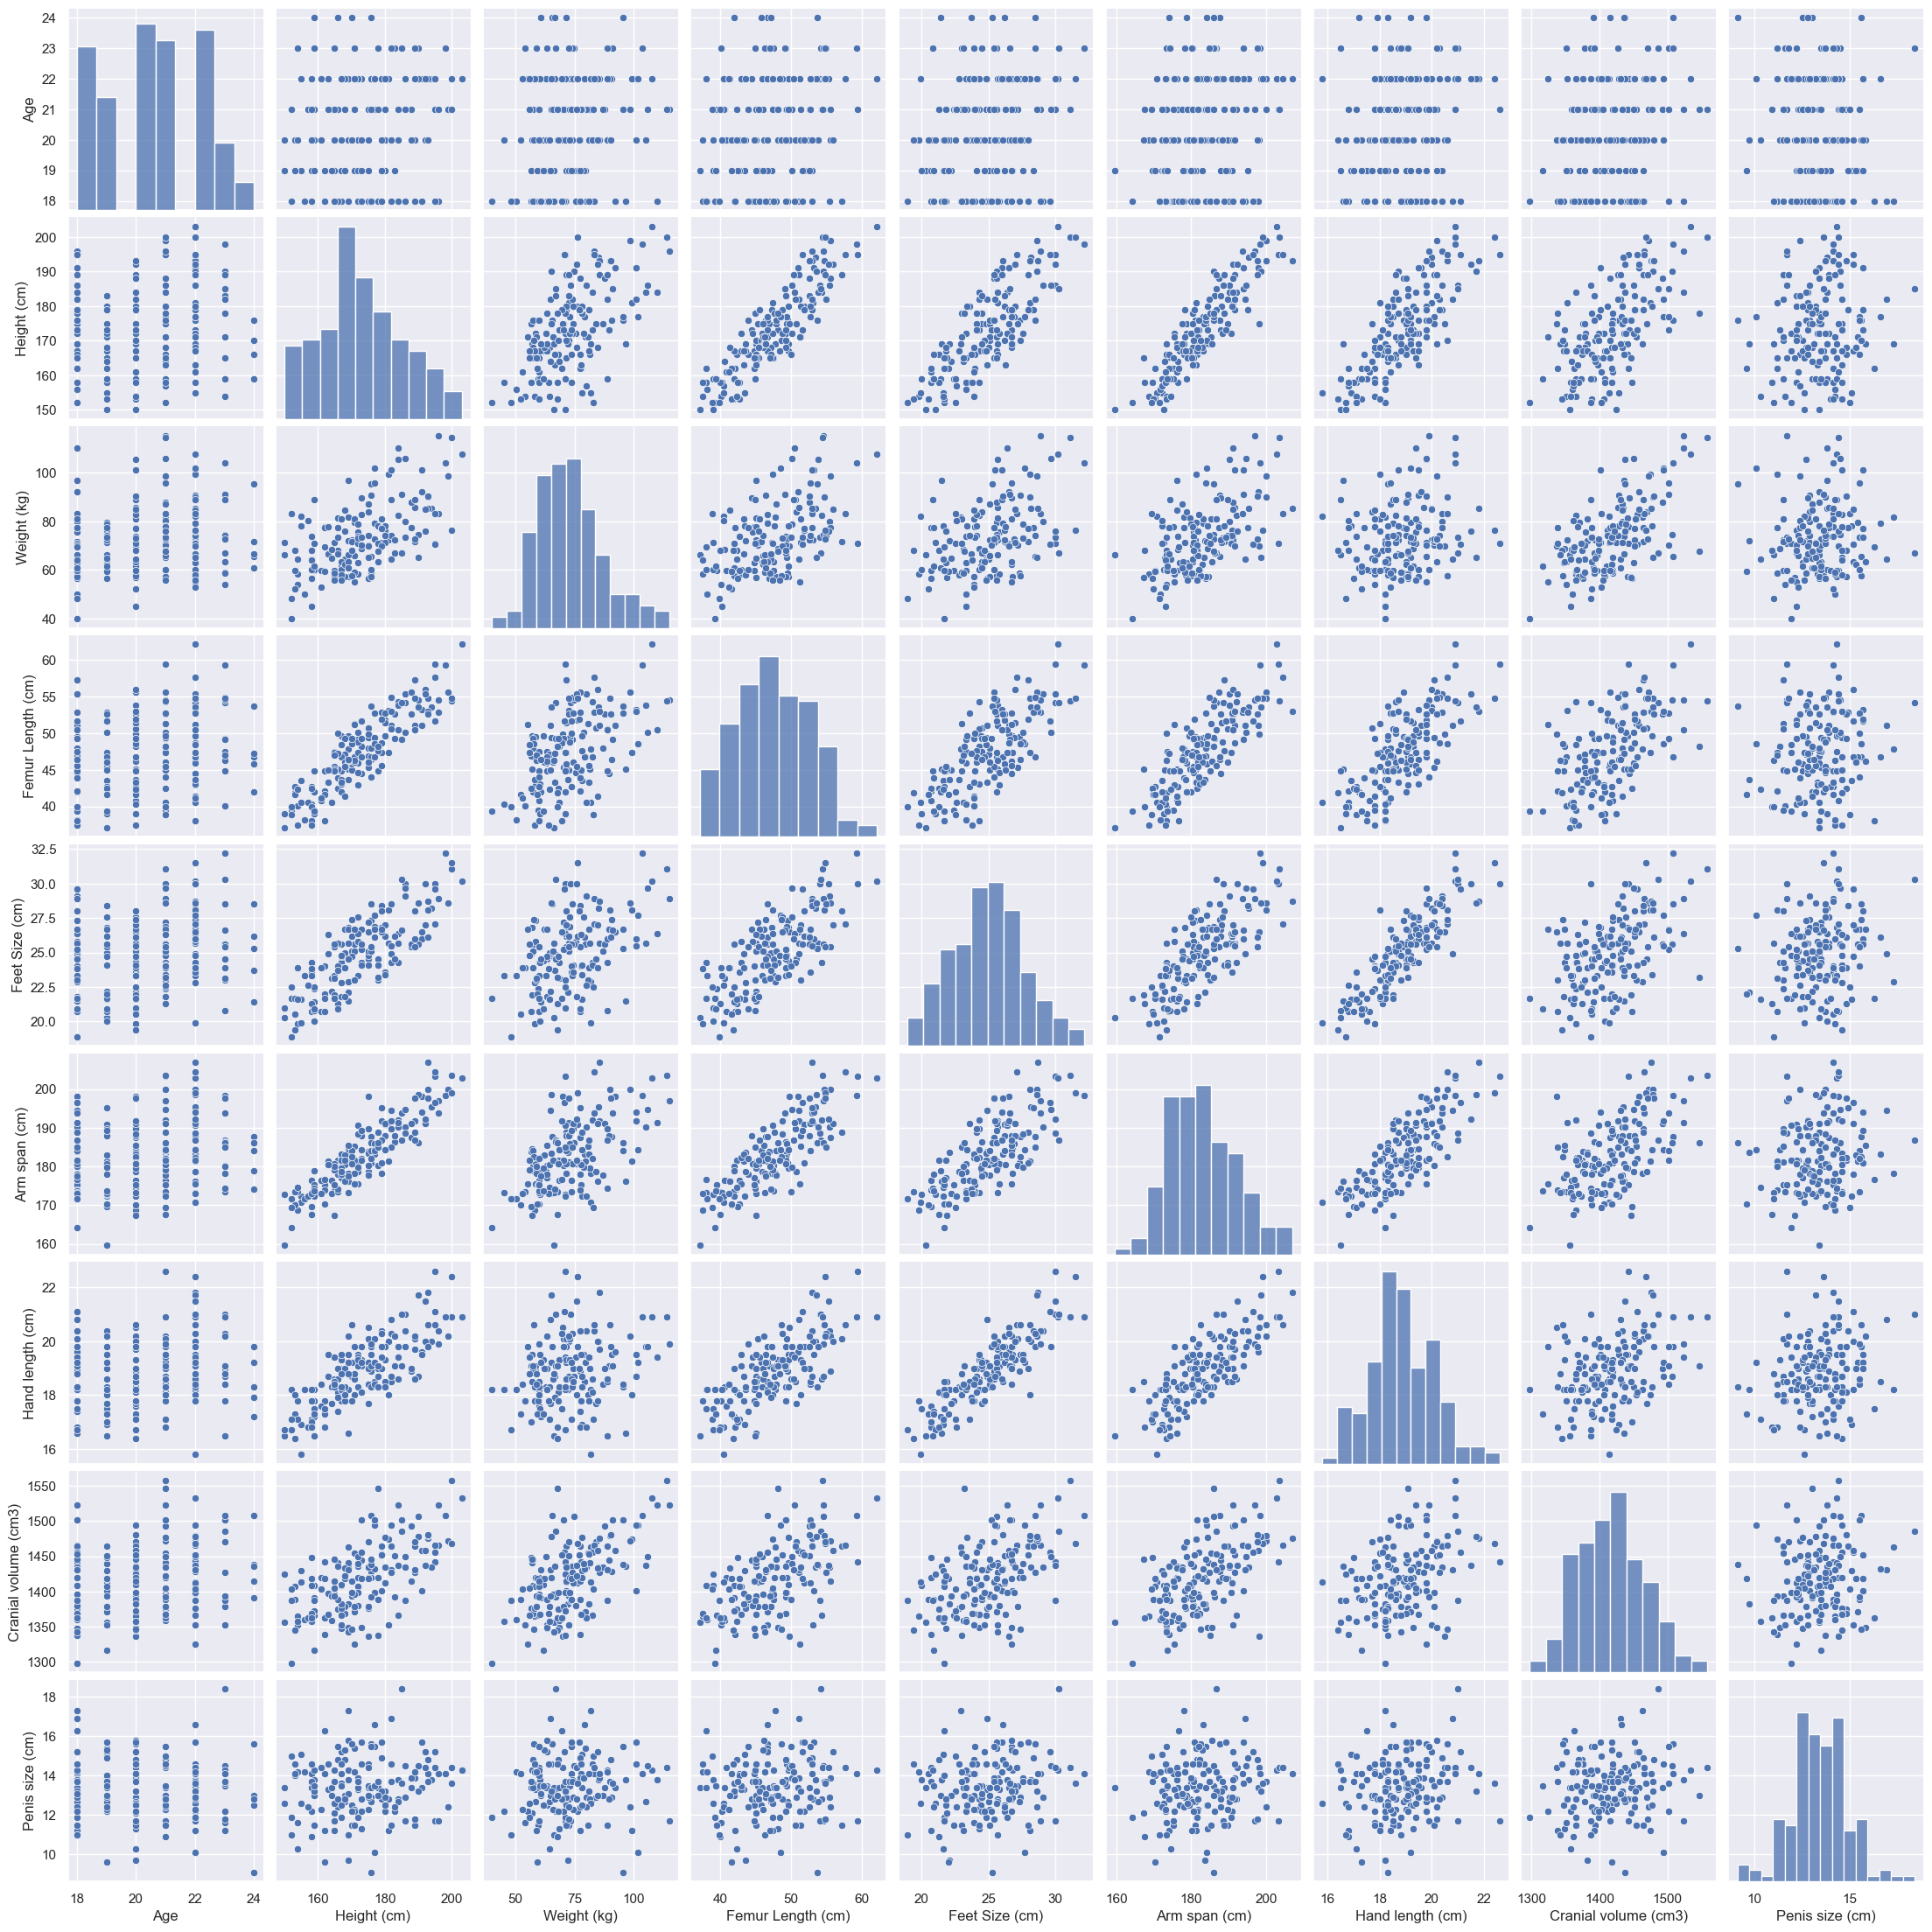

In [118]:
sns.pairplot(df_mansize)
plt.show()

<u> Answer 3</u>

- The age and penis size appear to be correlated with nothing. 
- The cranial volume only appears to have weak correlations with everything else.
- All other variables appear to be positively correlated.

#### Question 4 : Using the same techniques as in the previous exercise, display the correlations as well as determination coefficients between the different attributes using a heatmap. Comment your results. In particular, what can you say about the use in archaeology of the femur length to predict the height of an individual?

In [119]:
corr_matrix2 = df_mansize.corr()
det_matrix2=corr_matrix2*corr_matrix2

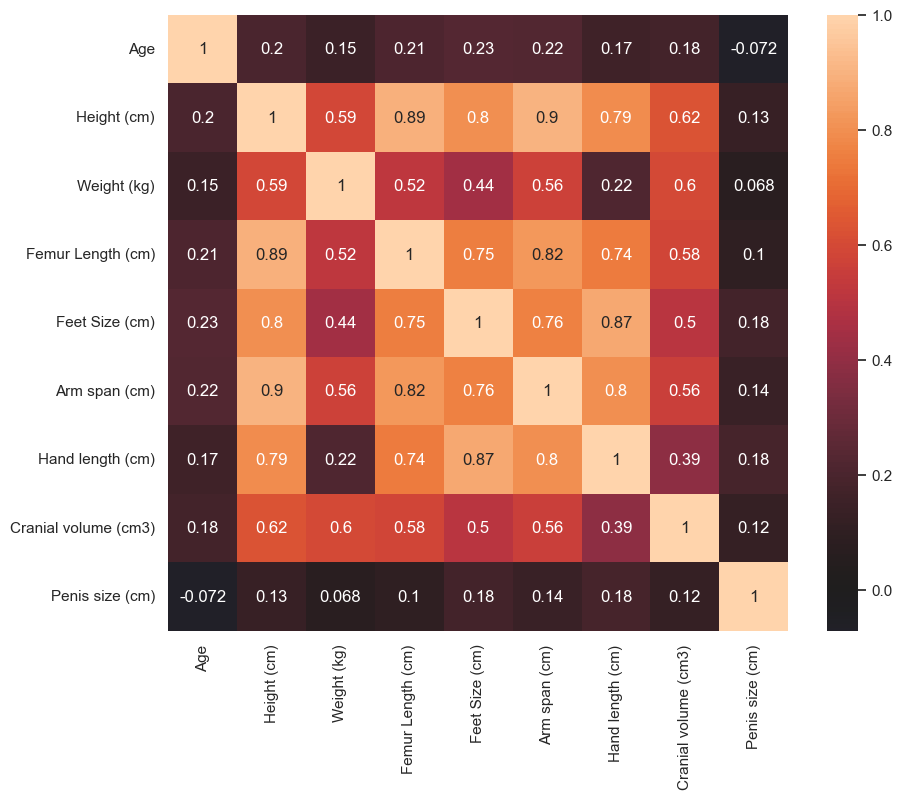

In [120]:
fig,axes = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix2,annot=True,center=0)
plt.show()

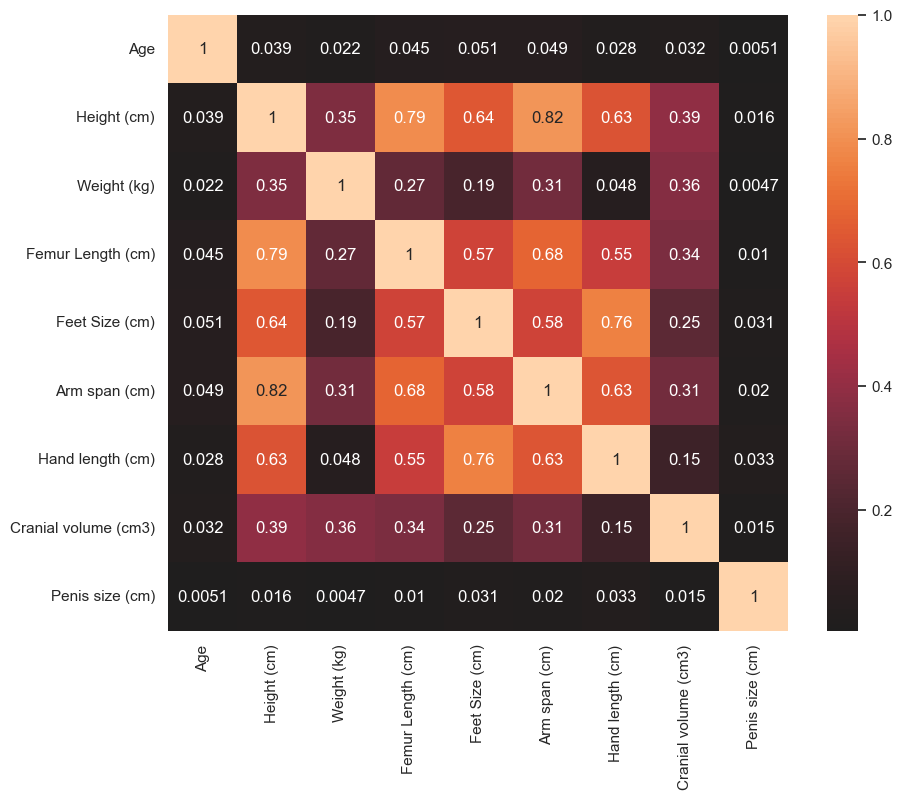

In [121]:
fig,axes = plt.subplots(figsize=(10,8))
sns.heatmap(det_matrix2,annot=True,center=0)
plt.show()

#### Question 5 : Compute the confidence intervals for the correlation coefficients (we will suppose that the attributes are following a normal distribution). Comment your results.

In [122]:
inferval_mansize_min,inferval_mansize_max= compute_all_interval(df_mansize)
inferval_mansize_diff = inferval_mansize_max - inferval_mansize_min

Minimum of the interval confidence


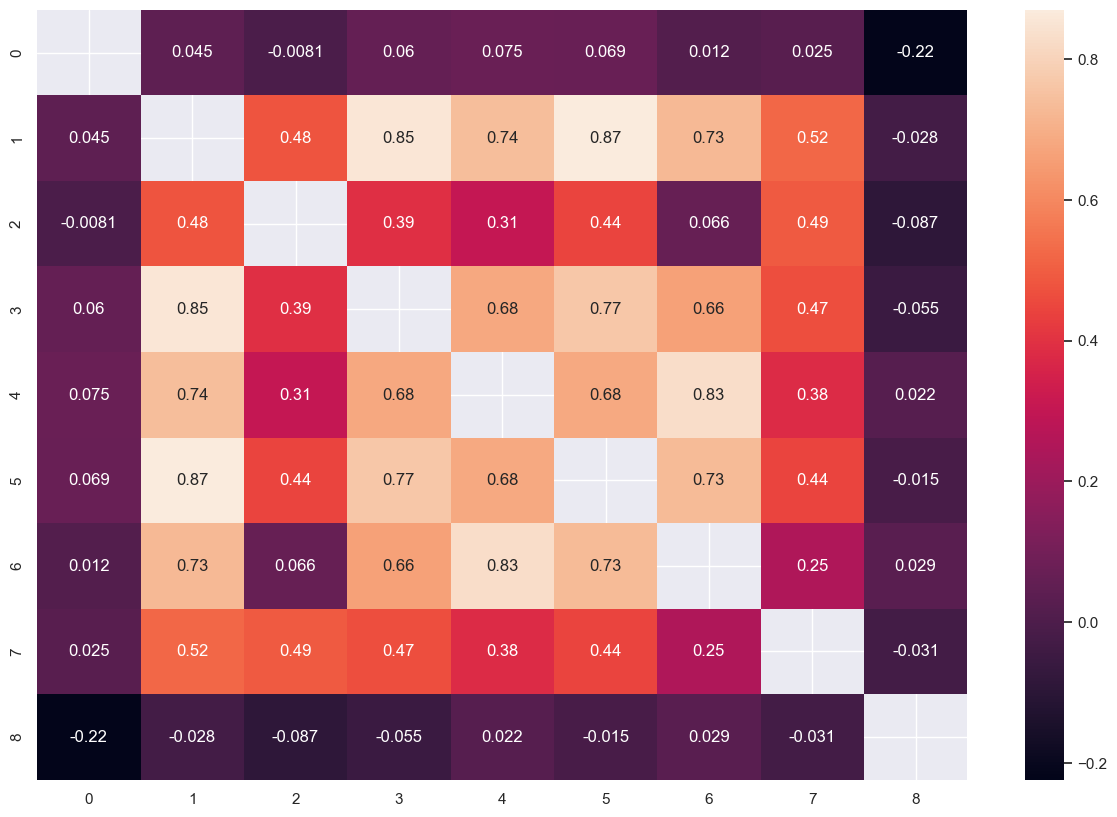

In [123]:
fig,axes = plt.subplots(figsize=(15,10))
mask = np.zeros_like(inferval_mansize_diff)

with sns.axes_style("white"):
    ax = sns.heatmap(inferval_mansize_min, mask=mask,annot=True)
    print('Minimum of the interval confidence')

Maximum of the interval confidence


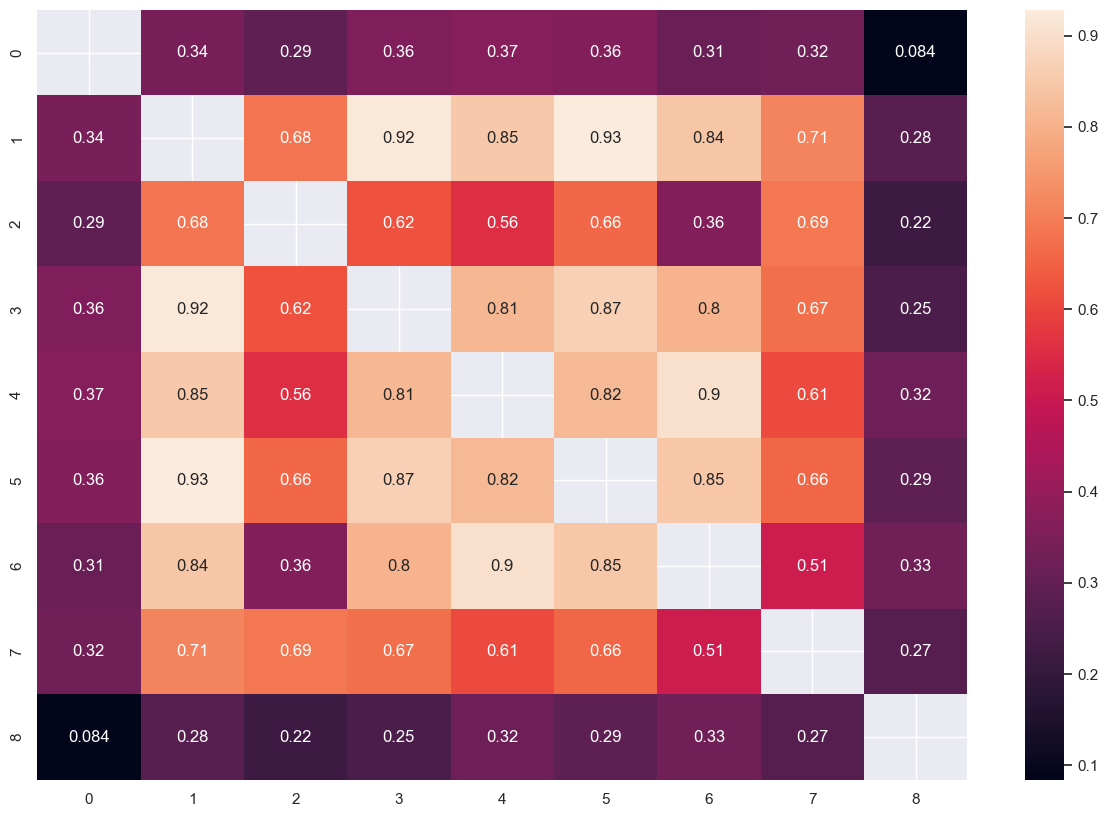

In [124]:
fig,axes = plt.subplots(figsize=(15,10))
mask = np.zeros_like(inferval_mansize_diff)

with sns.axes_style("white"):
    ax = sns.heatmap(inferval_mansize_max, mask=mask,annot=True)
    print('Maximum of the interval confidence')

## Part C : Bivariate medical data - a study on hay fever

The goal of this exercise is to analyze the result of a medical experiment and to deduce the efficiency (or lack of) of a trial drug. 
Petasite is a plant that has been used since the middle ages for its supposed healing abilities against  chronic allergic rhinitis, also known as hay fever. It is easily available in Europe, North Africa and in the Middle East. As such, if we could prove its efficiency, petasin might become an alternative drug for people suffering from hay fever and who want to avoid the sedative effect of regular antihistamine drugs that are commonly used against this type of allergic rhinitis.

For this studies, researchers and medical doctors recruited a random sample of people that have been suffering from chronic allergic rhinitis for at least two years.


The dataset "rhume.csv" contains the anonymized results of this study. The participants were split into 3 groups: one group got a placebo, another group got petasine, and the third group got fexofenadine (an antihistamine drug). For each participant, the number of days they suffered from allergic episode was counted over a 3 month period.

#### Question 1 : Open the rhume.csv file using pandas with the correct parameters

In [125]:
rhume = pd.read_csv("Data/rhume.csv",sep=";")
rhume.head()  

,Groupe,Nombre de jours malade
0,Placebo,59
1,Placebo,65
2,Placebo,46
3,Placebo,55
4,Placebo,53


#### Question 2 : Display a pie plot with the percentages of participants in each of the 3 groups.

<Axes: ylabel='count'>

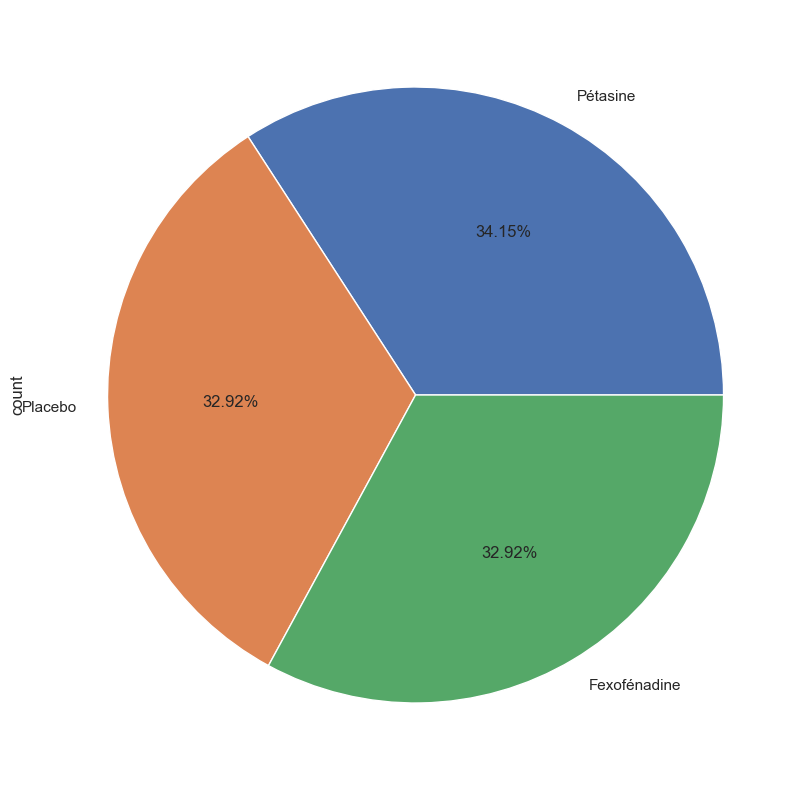

In [126]:
fig,axes = plt.subplots(1,1,figsize=(10,10))
rhume['Groupe'].value_counts().plot(kind='pie',autopct="%.2f%%")

#### Question 3 : For each group, compute the number of person in the group, as well as the mean amount of day they were sick and the associated standard deviation.

In [127]:
#placebo group
n_pl = rhume[rhume['Groupe']=='Placebo'].shape[0]
m_pl = np.mean(rhume[rhume['Groupe']=='Placebo']["Nombre de jours malade"])
std_pl = np.std(rhume[rhume['Groupe']=='Placebo']["Nombre de jours malade"])
print([n_pl, m_pl, std_pl])

[107, 56.13084112149533, 5.282813099645459]


In [128]:
#petasine group
n_pe = rhume[rhume['Groupe']=='Pétasine'].shape[0]
m_pe = np.mean(rhume[rhume['Groupe']=='Pétasine']["Nombre de jours malade"])
std_pe = np.std(rhume[rhume['Groupe']=='Pétasine']["Nombre de jours malade"])
print([n_pe, m_pe, std_pe])

[111, 20.16216216216216, 2.7064838415394687]


In [129]:
#fexofénadine group
n_fe = rhume[rhume['Groupe']=='Fexofénadine'].shape[0]
m_fe = np.mean(rhume[rhume['Groupe']=='Fexofénadine']["Nombre de jours malade"])
std_fe = np.std(rhume[rhume['Groupe']=='Fexofénadine']["Nombre de jours malade"])
print([n_fe, m_fe, std_fe])

[107, 16.560747663551403, 2.400068418391824]


#### Question 4 : Display a histogram with the number of sick day with different colors for each group. Comment.

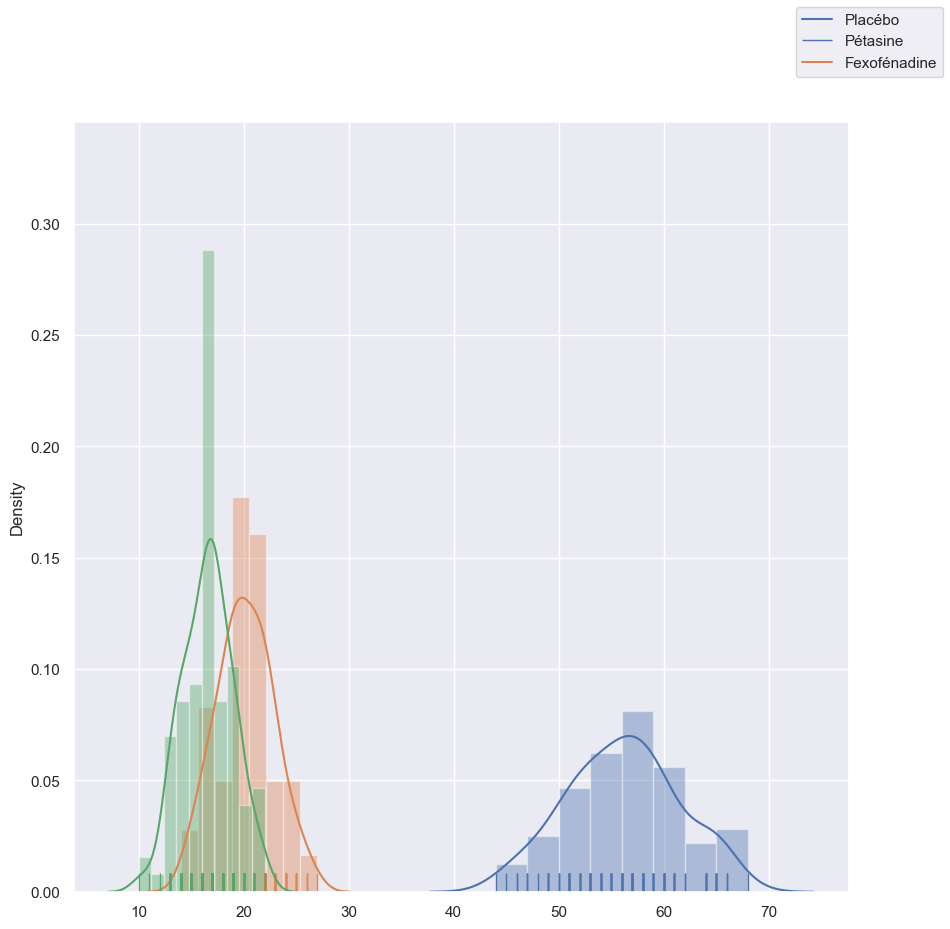

In [130]:
pl = rhume[rhume['Groupe']=='Placebo']
pe = rhume[rhume['Groupe']=='Pétasine']
fe = rhume[rhume['Groupe']=='Fexofénadine']

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.distplot(pl[['Nombre de jours malade']], hist=True, rug=True)
sns.distplot(pe[['Nombre de jours malade']], hist=True, rug=True)
sns.distplot(fe[['Nombre de jours malade']], hist=True, rug=True)
fig.legend(labels=['Placébo','Pétasine','Fexofénadine'])
plt.show()

<u> Answer 4 :</u>
    
We see that the fexofenadine and petasine groups have similar distributions and a much smaller number of sick days than the placebo group. Fexofenadine has a smaller mean number of sick days, but both histograms have a lot of overlap, it is therefore difficult to conclude on which is more effective.

#### Question 5 : Using the assumption that the number of sick days for each group follows a Gaussian distribution, compute the confidence intervals for each of the 3 groups.

In [131]:
#placebo group
IC95_w_min= m_pl - 1.96 * std_pl / np.sqrt(n_pl)
IC95_w_max= m_pl + 1.96 * std_pl / np.sqrt(n_pl)
print([IC95_w_min , IC95_w_max])

[55.129851836601134, 57.131830406389525]


In [132]:
#petasine group
IC95_w_min= m_pe - 1.96 * std_pe / np.sqrt(n_pe)
IC95_w_max= m_pe + 1.96 * std_pe / np.sqrt(n_pe)
print([IC95_w_min , IC95_w_max])

[19.658661529562025, 20.665662794762298]


In [133]:
#fexofenadine group
IC95_w_min= m_fe - 1.96 * std_fe / np.sqrt(n_fe)
IC95_w_max= m_fe + 1.96 * std_fe / np.sqrt(n_fe)
print([IC95_w_min , IC95_w_max])

[16.105981855163368, 17.01551347193944]


#### Question 6 : Comment on your results and conclude on the possible efficiency of petasine as an effective treatment against hay fever. You will argument on the eventuals flaws of the proposed trial process.

<u>Answer 6 :</u>

- We confirm that the placebo group has a disjoint interval with the other two groups, therefore both mollecule have a significant effect.
- The fexofenadine and petasine intervals are also disctinct and separate, therefore while both mollecule work, fexofenadine is slightly better